In [1]:
## Interactive magics - comment out if running from another script
%matplotlib notebook
%qtconsole --colors=linux --ConsoleWidget.font_size=12 --ConsoleWidget.font_family='Consolas'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from app.process import get_cleaned_processed_df
from app.evaluation import get_training_and_validation_df, complete_columns, drop_text_features

from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interactive, fixed

sns.set(style="darkgrid", palette="muted")
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

/home/madness/Documents/Projects/git_better/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/madness/Documents/Projects/git_better/venv/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
ERROR:root:Can't import Theano: No module named theanets


Tensorflow not installed


In [3]:
def plot_2d_tsne(df, y, file_name, preprocess=False):
    if preprocess:
        from app.preprocess import ColumnSumFilter, ColumnStdFilter
        ppl = Pipeline([
            ('clmn_std_filter', ColumnStdFilter(min_std=10)),
            ('clmn_sum_filter', ColumnSumFilter(min_sum=10000))
        ])
        df = ppl.transform(df)

    from app.preprocess import get_text_feature_names
    for c in get_text_feature_names(df):
        df = df.drop(c, axis=1)
    df.fillna(0, inplace=True)
    
    X_tsne = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(df)
    df_transformed = pd.DataFrame(data=X_tsne)
    df_transformed = df_transformed.join(y)
    
    if y.describe()["unique"] == 2:
        palette = sns.xkcd_palette(["bright green", "royal blue"])
    else:
        palette = sns.color_palette("colorblind", 8)
    pl = sns.pairplot(df_transformed, x_vars=df_transformed.columns[0],
                      y_vars=df_transformed.columns[1], size=12, hue=y.name, palette=palette)
    pl.savefig(file_name, format='svg', dpi=900)
    return pl

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1412
[t-SNE] Computed conditional probabilities for sample 1412 / 1412
[t-SNE] Mean sigma: 21.308717
[t-SNE] Iteration 25: error = 1.1753436, gradient norm = 0.0075094
[t-SNE] Iteration 50: error = 1.0121229, gradient norm = 0.0072799
[t-SNE] Iteration 75: error = 0.6600252, gradient norm = 0.0062746
[t-SNE] Iteration 100: error = 0.6341822, gradient norm = 0.0048861
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.634182
[t-SNE] Iteration 125: error = 0.5597788, gradient norm = 0.0046245
[t-SNE] Iteration 150: error = 0.5427228, gradient norm = 0.0053316
[t-SNE] Iteration 175: error = 0.5418280, gradient norm = 0.0049467
[t-SNE] Iteration 200: error = 0.5443574, gradient norm = 0.0051958
[t-SNE] Iteration 225: error = 0.5439426, gradient norm = 0.0047960
[t-SNE] Iteration 225: did not make any progress during the last 30 e

<IPython.core.display.Javascript object>


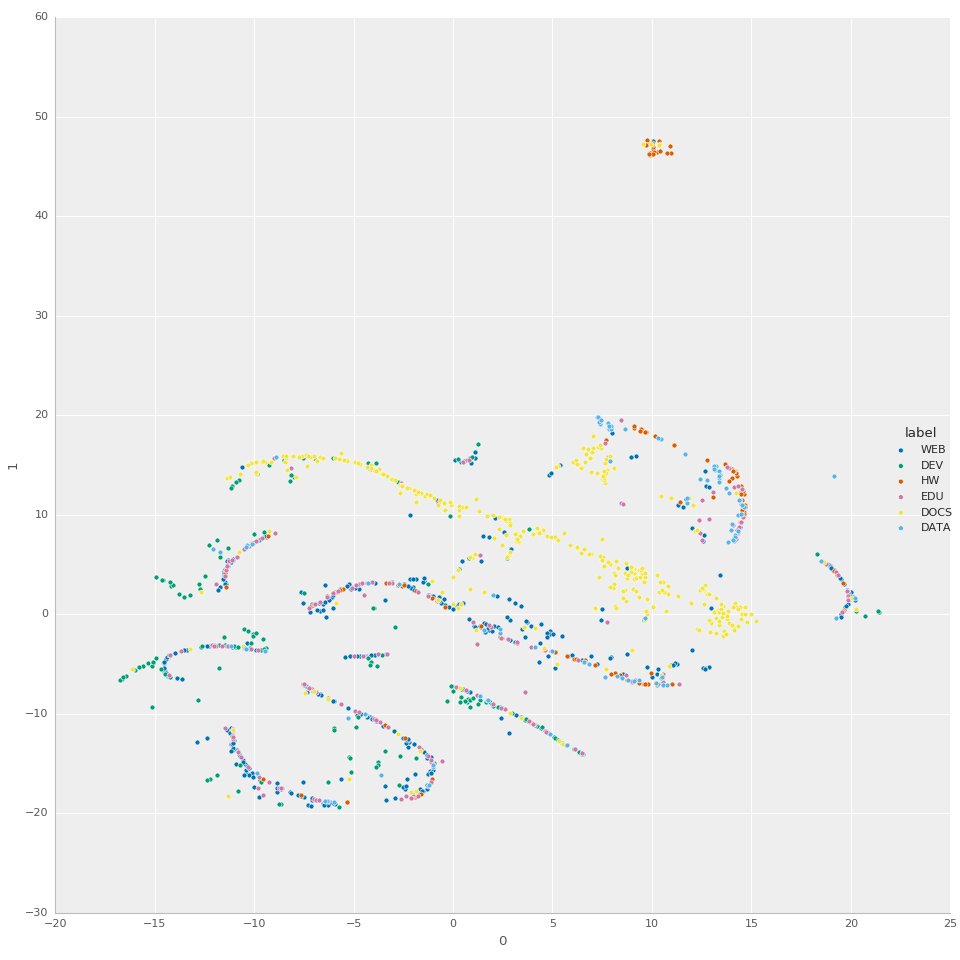

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1412
[t-SNE] Computed conditional probabilities for sample 1412 / 1412
[t-SNE] Mean sigma: 36.074332
[t-SNE] Iteration 25: error = 1.1543134, gradient norm = 0.0076742
[t-SNE] Iteration 50: error = 1.0051516, gradient norm = 0.0066463
[t-SNE] Iteration 75: error = 0.6508905, gradient norm = 0.0043332
[t-SNE] Iteration 100: error = 0.6011693, gradient norm = 0.0050383
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.601169
[t-SNE] Iteration 125: error = 0.5365755, gradient norm = 0.0046109
[t-SNE] Iteration 150: error = 0.5139616, gradient norm = 0.0057973
[t-SNE] Iteration 175: error = 0.5203577, gradient norm = 0.0037983
[t-SNE] Iteration 200: error = 0.5166495, gradient norm = 0.0045150
[t-SNE] Iteration 200: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 200 iterations: 0.601169


<IPython.core.display.Javascript object>


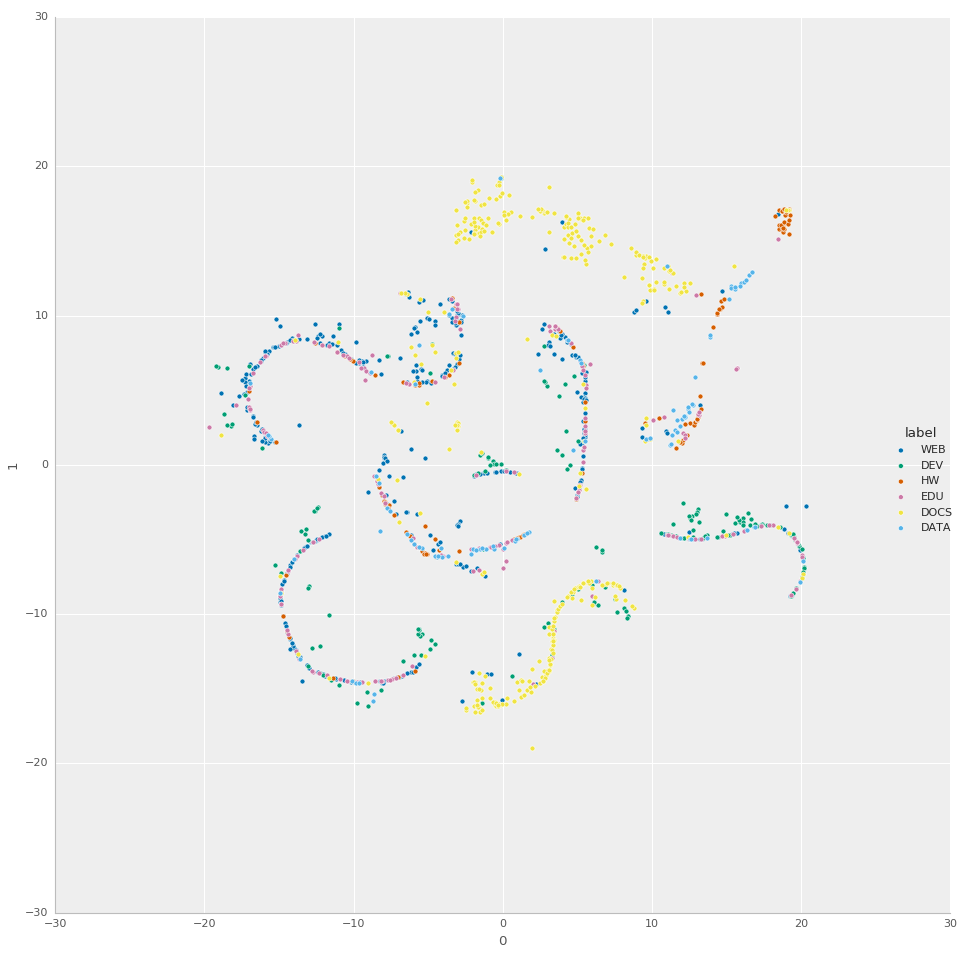

In [4]:
#Plot the class distribution in the training set
df = get_cleaned_processed_df()
y = df["label"]
plot_2d_tsne(df, y, "raw_class_distribution.svg")
plot_2d_tsne(df, y, "preprocessed_class_distribution.svg", preprocess=True)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1443
[t-SNE] Computed conditional probabilities for sample 1443 / 1443
[t-SNE] Mean sigma: 21.036028
[t-SNE] Iteration 25: error = 1.2031515, gradient norm = 0.0078495
[t-SNE] Iteration 50: error = 1.0329822, gradient norm = 0.0067116
[t-SNE] Iteration 75: error = 0.6719437, gradient norm = 0.0048756
[t-SNE] Iteration 100: error = 0.6213125, gradient norm = 0.0049665
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.621312
[t-SNE] Iteration 125: error = 0.5409960, gradient norm = 0.0049663
[t-SNE] Iteration 150: error = 0.5146534, gradient norm = 0.0053696
[t-SNE] Iteration 175: error = 0.5174559, gradient norm = 0.0048222
[t-SNE] Iteration 200: error = 0.5174844, gradient norm = 0.0057167
[t-SNE] Iteration 200: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 200 iterations: 0.621312


<IPython.core.display.Javascript object>


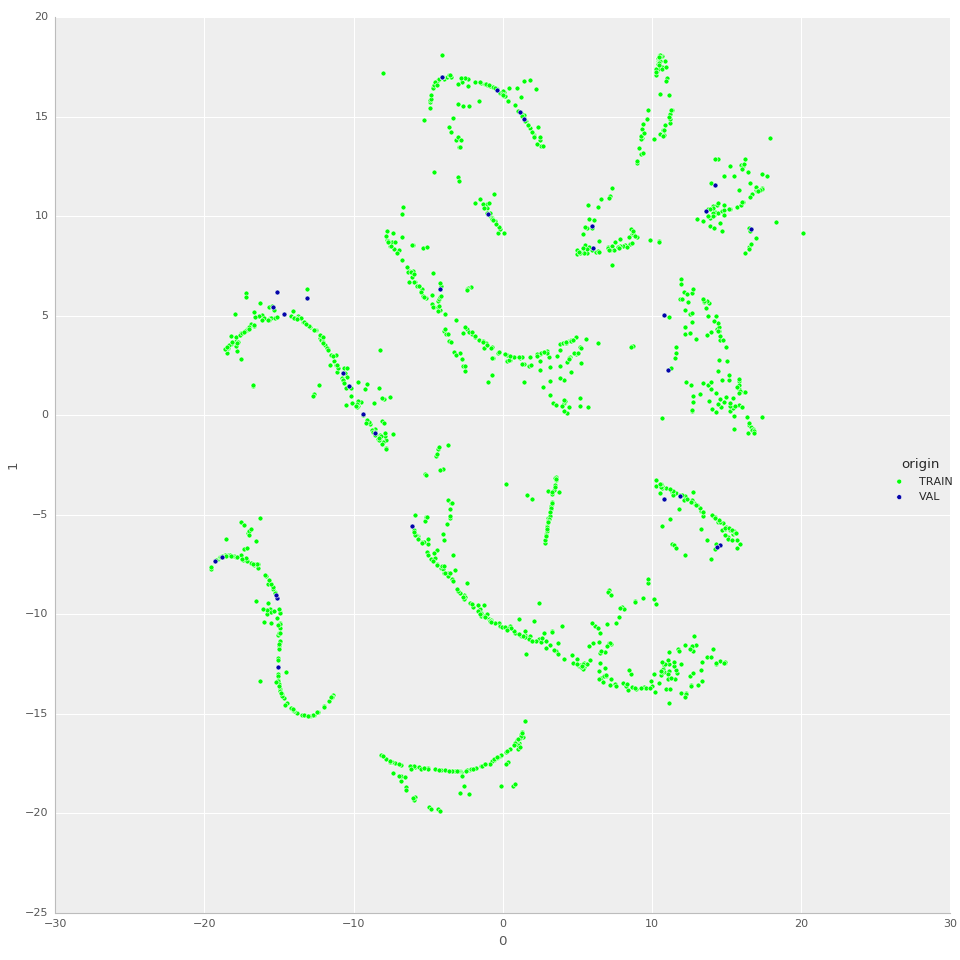

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1443
[t-SNE] Computed conditional probabilities for sample 1443 / 1443
[t-SNE] Mean sigma: 36.059741
[t-SNE] Iteration 25: error = 1.1378976, gradient norm = 0.0066493
[t-SNE] Iteration 50: error = 0.9720532, gradient norm = 0.0058938
[t-SNE] Iteration 75: error = 0.6038578, gradient norm = 0.0061586
[t-SNE] Iteration 100: error = 0.5709066, gradient norm = 0.0046164
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.570907
[t-SNE] Iteration 125: error = 0.5008261, gradient norm = 0.0039405
[t-SNE] Iteration 150: error = 0.4761257, gradient norm = 0.0051941
[t-SNE] Iteration 175: error = 0.4823245, gradient norm = 0.0036604
[t-SNE] Iteration 200: error = 0.4817390, gradient norm = 0.0036875
[t-SNE] Iteration 200: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 200 iterations: 0.570907


<IPython.core.display.Javascript object>


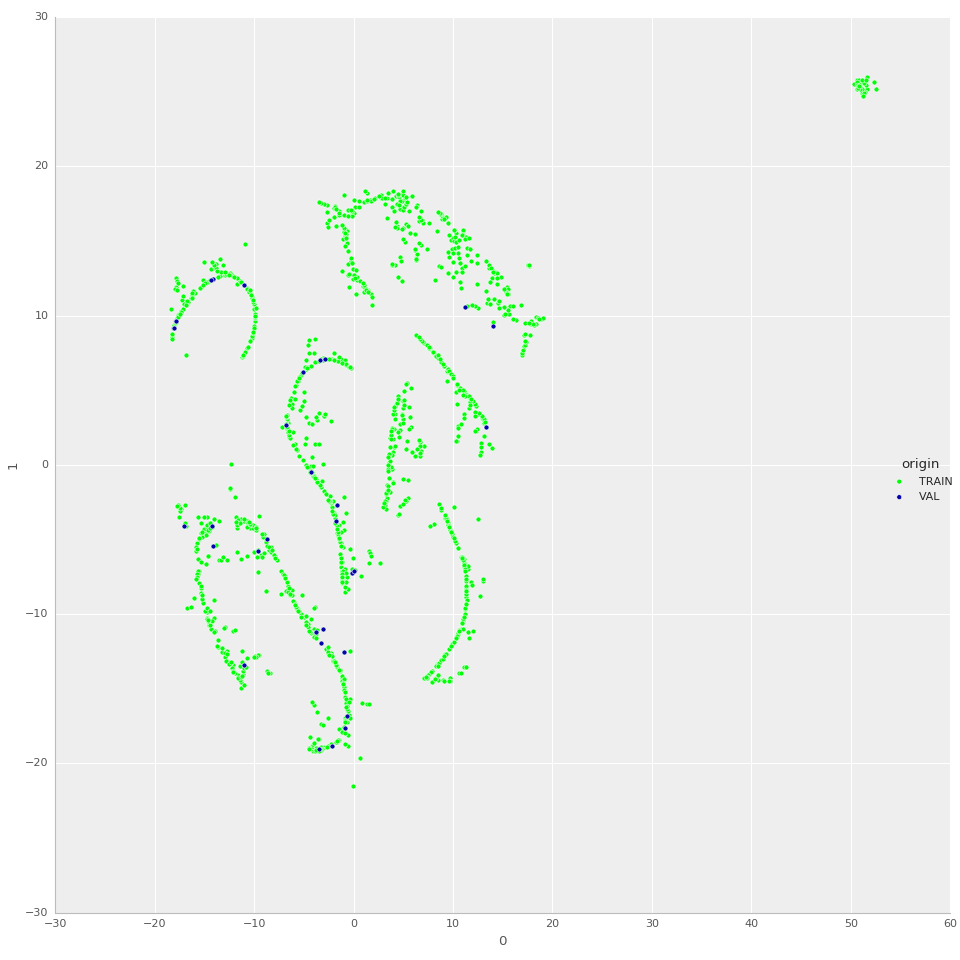

In [5]:
# Plot the similarity between the training and the validation set
df = get_cleaned_processed_df()
val_df = pd.DataFrame.from_csv("data/validation_data.csv")
df["origin"] = "TRAIN"
val_df["origin"] = "VAL"
df, val_df = complete_columns(df, val_df)
df = df.append(val_df)
y = df["origin"]

plot_2d_tsne(df, y, "raw_validation_data_similarity.svg")
plot_2d_tsne(df, y, "preprocessed_validation_data_similarity.svg", preprocess=True)